In [1]:
%matplotlib inline

# Feature Visualizer

This notebook provides examples of visualizations done in other data studies and modifies them using the Yellowbrick library


The first set of examples comes from the [blog](https://blog.insightdatascience.com/show-me-the-data-using-graphics-for-exploratory-data-analysis-d686af4468f6#.a9knkdnu9 "blog") titled: Show Me The Data: Using Graphics for Exploratory Data Analysis.  This blog begins with the same case outlined in the Yellowbrick examples notebook: Anscombe's quartet to stress the importance of visualization when conducting data analysis.  It is worth showing again.


In [2]:
import os
import sys 

# Modify the path 
sys.path.append("..")

import pandas as pd
import yellowbrick as yb 
import matplotlib.pyplot as plt

/Users/Copper/anaconda/envs/py36/lib/python3.6/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


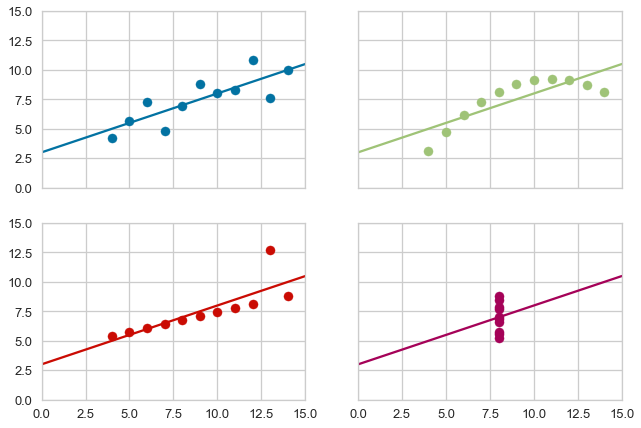

In [3]:
g = yb.anscombe()

Using the above example, the author explains how important it is to get a visual representation of the data.  He goes on to create graphics to show the characteristics of all the features along with a correlation matrix to illustrate relationships between the features.  We will do the same using the Yellowbrick API and the "concrete" data set.  Instead of creating a correlation matrix, we will create a covariance matrix.

In [4]:
from download import download_all 

## The path to the test data sets
FIXTURES  = os.path.join(os.getcwd(), "data")

## Dataset loading mechanisms
datasets = {
    "credit": os.path.join(FIXTURES, "credit", "credit.csv"),
    "concrete": os.path.join(FIXTURES, "concrete", "concrete.csv"),
    "occupancy": os.path.join(FIXTURES, "occupancy", "occupancy.csv"),
}


def load_data(name, download=True):
    """
    Loads and wrangles the passed in dataset by name.
    If download is specified, this method will download any missing files. 
    """
    
    # Get the path from the datasets 
    path = datasets[name]
    
    # Check if the data exists, otherwise download or raise 
    if not os.path.exists(path):
        if download:
            download_all() 
        else:
            raise ValueError((
                "'{}' dataset has not been downloaded, "
                "use the download.py module to fetch datasets"
            ).format(name))
        
    
    # Return the data frame
    return pd.read_csv(path)

In [5]:
# Load the data
df = load_data('concrete')
features = ['cement', 'slag', 'ash', 'water', 'splast', 'coarse', 'fine', 'age']
target = 'strength'
# Get the X and y data from the DataFrame 
X = df[features].as_matrix()
y = df[target].as_matrix() 

Now let's look at histograms of the features to get their characteristics.

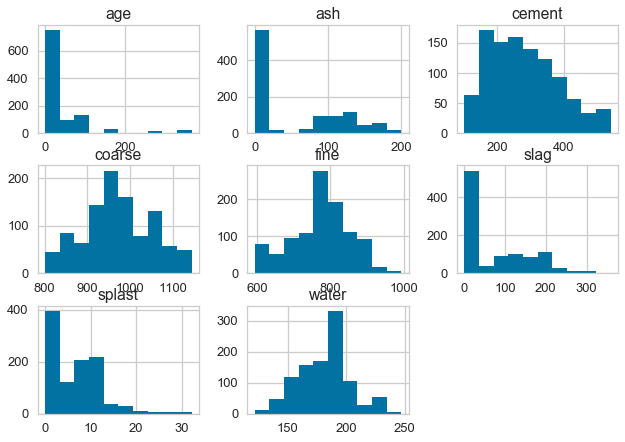

In [6]:
feature_hist = df.hist(column=features)

Now let's look at the covariance matrix of the features.

In [7]:
from yellowbrick.features.rankd import Rank2D 

/Users/Copper/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


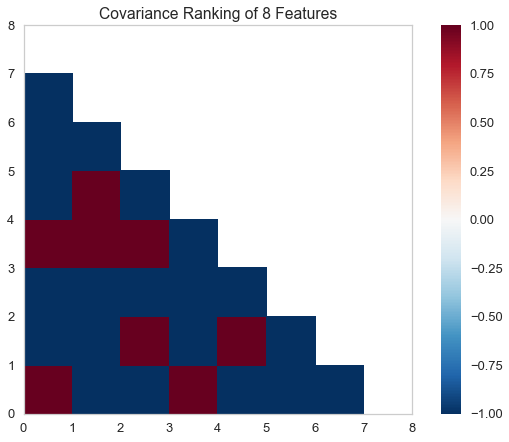

In [8]:
# Instantiate the visualizer with the Pearson ranking algorithm 
visualizer = Rank2D(features=features, algorithm='covariance')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.show()    # Draw/show/show the data

The next set of examples comes from [lecture notes](http://www.ics.uci.edu/~newman/courses/cs277/slides/lecture4_EDA_and_Visualization.pdf "lecture notes") from the Univeristy of California Irvine CS277 class.


There are several scatterplots showing different types of relationships between features, such as linear and quadratic relationships.  We will take the 'concrete' data set and use Yellowbrick's best fit curve visualization to show relationships between the the 'age' feature and the 'strength' target variable.

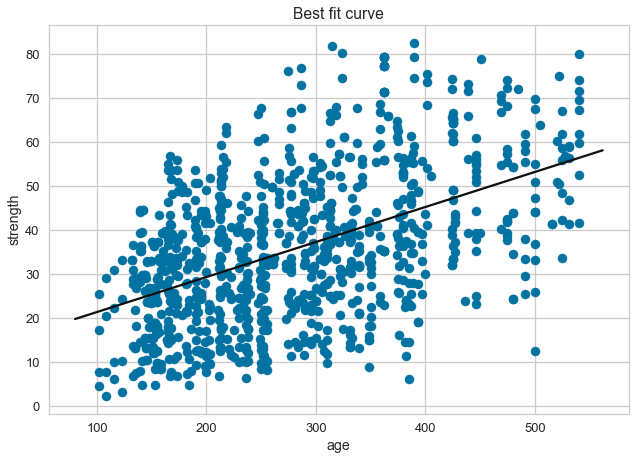

In [9]:
x_val = df['cement'].as_matrix()
fig, ax = plt.subplots()
ax.set_xlabel('age')
ax.set_ylabel('strength')
ax.set_title('Best fit curve')
ax.scatter(x_val, y)
g = yb.bestfit.draw_best_fit(x_val, y, ax, estimator='linear')

The document also shows an example using parallel coordinates as an example of multivariate visualization whereby all dimensions can be shown.  Yellowbrick has an example that shows exactly how this can be achieved.

In [10]:
from yellowbrick.features.pcoords import ParallelCoordinates

# Load the classification data set
data = load_data('occupancy') 

# Specify the features of interest and the classes of the target 
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']

# Extract the numpy arrays from the data frame 
X = data[features].as_matrix()
y = data.occupancy.as_matrix()

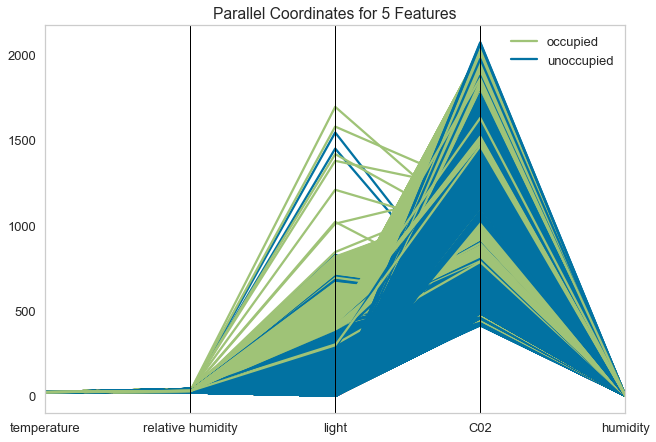

In [11]:
# Instantiate the visualizer
visualizer = visualizer = ParallelCoordinates(classes=classes, features=features)

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.show()         # Draw/show/show the data